# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [148]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [3]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

Let's first plot the distributions of values in each feature:

(array([ 219.,  123.,   50.,   21.,    6.,    9.,    5.,    1.,    2.,
           0.,    0.,    0.,    0.,    0.,    1.,    1.,    0.,    1.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.]),
 array([  3.00000000e+00,   9.61800000e+02,   1.92060000e+03,
          2.87940000e+03,   3.83820000e+03,   4.79700000e+03,
          5.75580000e+03,   6.71460000e+03,   7.67340000e+03,
          8.63220000e+03,   9.59100000e+03,   1.05498000e+04,
          1.15086000e+04,   1.24674000e+04,   1.34262000e+04,
          1.43850000e+04,   1.53438000e+04,   1.63026000e+04,
          1.72614000e+04,   1.82202000e+04,   1.91790000e+04,
          2.01378000e+04,   2.10966000e+04,   2.20554000e+04,
          2.30142000e+04,   2.39730000e+04,   2.49318000e+04,
          2.58906000e+04,   2.68494000e+04

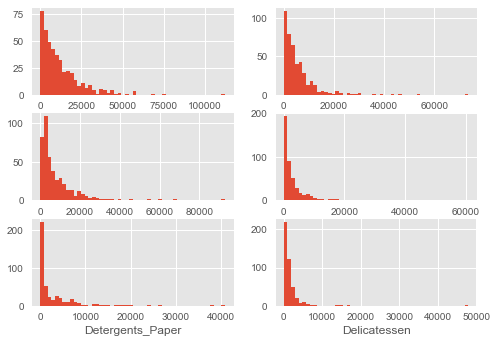

In [22]:
# Fresh:
freshFeat = data['Fresh']
pp.subplot(3, 2, 1)
pp.xlabel('Fresh')
pp.hist(freshFeat, bins = 50)

# Milk:
milkFeat = data['Milk']
pp.subplot(3, 2, 2)
pp.xlabel('Milk')
pp.hist(milkFeat, bins = 50)

# Grocery:
groceryFeat = data['Grocery']
pp.subplot(3, 2, 3)
pp.xlabel('Grocery')
pp.hist(groceryFeat, bins = 50)

# Frozen:
frozenFeat = data['Frozen']
pp.subplot(3, 2, 4)
pp.xlabel('Frozen')
pp.hist(frozenFeat, bins = 50)

# Detergents_Paper:
detergents_PaperFeat = data['Detergents_Paper']
pp.subplot(3, 2, 5)
pp.xlabel('Detergents_Paper')
pp.hist(detergents_PaperFeat, bins = 50)

# Delicatessen:
delicatessenFeat = data['Delicatessen']
pp.subplot(3, 2, 6)
pp.xlabel('Delicatessen')
pp.hist(delicatessenFeat, bins = 50)



Let's then see which indexes have the maximum values in each feature:

In [150]:
print freshFeat.idxmax()
print milkFeat.idxmax()
print groceryFeat.idxmax()
print frozenFeat.idxmax()
print detergents_PaperFeat.idxmax()
print delicatessenFeat.idxmax()

181
86
85
325
85
183


Let's see how these instances look like:

In [193]:
print data.loc[freshFeat.idxmax()]
print data.loc[milkFeat.idxmax()]
print data.loc[groceryFeat.idxmax()]
print data.loc[frozenFeat.idxmax()]
print data.loc[detergents_PaperFeat.idxmax()]
print data.loc[delicatessenFeat.idxmax()]

Fresh               112151
Milk                 29627
Grocery              18148
Frozen               16745
Detergents_Paper      4948
Delicatessen          8550
Name: 181, dtype: int64
Fresh               22925
Milk                73498
Grocery             32114
Frozen                987
Detergents_Paper    20070
Delicatessen          903
Name: 86, dtype: int64
Fresh               16117
Milk                46197
Grocery             92780
Frozen               1026
Detergents_Paper    40827
Delicatessen         2944
Name: 85, dtype: int64
Fresh               32717
Milk                16784
Grocery             13626
Frozen              60869
Detergents_Paper     1272
Delicatessen         5609
Name: 325, dtype: int64
Fresh               16117
Milk                46197
Grocery             92780
Frozen               1026
Detergents_Paper    40827
Delicatessen         2944
Name: 85, dtype: int64
Fresh               36847
Milk                43950
Grocery             20170
Frozen             

Let's then check the same with smalles values:

In [194]:
print freshFeat.idxmin()
print milkFeat.idxmin()
print groceryFeat.idxmin()
print frozenFeat.idxmin()
print detergents_PaperFeat.idxmin()
print delicatessenFeat.idxmin()

95
154
75
420
75
109


In [195]:
print data.loc[freshFeat.idxmin()]
print data.loc[milkFeat.idxmin()]
print data.loc[groceryFeat.idxmin()]
print data.loc[frozenFeat.idxmin()]
print data.loc[detergents_PaperFeat.idxmin()]
print data.loc[delicatessenFeat.idxmin()]

Fresh                  3
Milk                2920
Grocery             6252
Frozen               440
Detergents_Paper     223
Delicatessen         709
Name: 95, dtype: int64
Fresh               622
Milk                 55
Grocery             137
Frozen               75
Detergents_Paper      7
Delicatessen          8
Name: 154, dtype: int64
Fresh               20398
Milk                 1137
Grocery                 3
Frozen               4407
Detergents_Paper        3
Delicatessen          975
Name: 75, dtype: int64
Fresh                4456
Milk                 5266
Grocery             13227
Frozen                 25
Detergents_Paper     6818
Delicatessen         1393
Name: 420, dtype: int64
Fresh               20398
Milk                 1137
Grocery                 3
Frozen               4407
Detergents_Paper        3
Delicatessen          975
Name: 75, dtype: int64
Fresh                1406
Milk                16729
Grocery             28986
Frozen                673
Detergents_Paper 

Let's then see what are the minimum and maximum extremes in total spending:

In [155]:
dataCopy = data.copy()
dataCopy['total'] = dataCopy['Fresh'] + dataCopy['Milk'] + dataCopy['Grocery'] + dataCopy['Frozen'] + dataCopy['Detergents_Paper'] + dataCopy['Delicatessen']

In [188]:
print "The index of the data point with the highest total: ", dataCopy['total'].idxmax()
print "The index of the data point with the lowest total: ", dataCopy['total'].idxmin()
print "\nThe data point with the highest total: \n", dataCopy.loc[dataCopy['total'].idxmax()]
print "\nThe data point with the lowest total: \n", dataCopy.loc[dataCopy['total'].idxmin()]

The index of the data point with the highest total:  85
The index of the data point with the lowest total:  154

The data point with the highest total: 
Fresh                16117
Milk                 46197
Grocery              92780
Frozen                1026
Detergents_Paper     40827
Delicatessen          2944
total               199891
Name: 85, dtype: int64

The data point with the lowest total: 
Fresh               622
Milk                 55
Grocery             137
Frozen               75
Detergents_Paper      7
Delicatessen          8
total               904
Name: 154, dtype: int64


Based on these and wanting to pick instances that are very different from each other, good candidates to pick would be no 85 with two extreme large values and the highest total spending, 154 with the smallest total spending and 75 with two extreme small values. However, as later on we will want remove low values as outliers, picking 154 or 75 is not a good idea. Instead, we could pick 95, 420 or 109 as a representative of low values. So I'll go with 85 as a sample of large values and 95 as a sample of small values.

Let's then try to find one instance that is the most similar to, i.e. the shortest distance away from, the mean of the categories. In other words, let's try to find the instance that represents the average the best.

In [172]:
distancesFromMean = abs((data - data.mean())/ data.std(ddof=0))
sumOfDistancesFromMean = np.sum(distancesFromMean, axis = 1)

In [173]:
print "The index of the data point with the smallest sum of distances from the mean: ", sumOfDistancesFromMean.idxmin()
print "\nIts sum of distances from the mean was: ", sumOfDistancesFromMean.loc[sumOfDistancesFromMean.idxmin()]
print "\nThe data point was: \n", data.loc[sumOfDistancesFromMean.idxmin()]

The index of the data point with the smallest sum of distances from the mean:  415

Its sum of distances from the mean was:  0.973313923503

The data point was: 
Fresh               7842
Milk                6046
Grocery             8552
Frozen              1691
Detergents_Paper    3540
Delicatessen        1874
Name: 415, dtype: int64


With this way of calculating, instance 415 is the most similar to average, and we could pick that one.

Let's yet see what would be the instance most different from the average when calculated in the same way.

In [174]:
print "The index of the data point with the largest sum of distances from the mean: ", sumOfDistancesFromMean.idxmax()
print "\nIts sum of distances from the mean was: ", sumOfDistancesFromMean.loc[sumOfDistancesFromMean.idxmax()]
print "\nThe data point was: \n", data.loc[sumOfDistancesFromMean.idxmax()]

The index of the data point with the largest sum of distances from the mean:  183

Its sum of distances from the mean was:  32.3634465326

The data point was: 
Fresh               36847
Milk                43950
Grocery             20170
Frozen              36534
Detergents_Paper      239
Delicatessen        47943
Name: 183, dtype: int64


The result is 183, which we have already got earlier as the instance with the highest spending in Delicatessen category.

Now we have four candidates to be selected: 85, 154, 415 and 183. Let's take a look at them in a heat map to determine which three to pick:

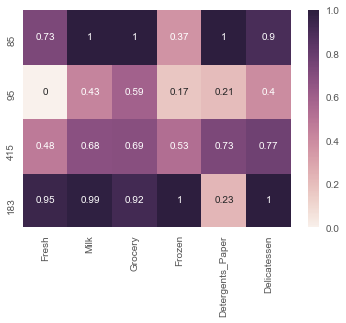

In [196]:
import seaborn as sb
indices = [85, 95, 415, 183]
sb.heatmap(data.rank(pct = True).loc[indices].round(decimals=2), vmin=0.00, vmax=1.00, annot = True)

Based on the heatmap, I would say either one of 85 and 183 will do, so I'll go for 85.

In [197]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [85, 95, 415]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16117,46197,92780,1026,40827,2944
1,3,2920,6252,440,223,709
2,7842,6046,8552,1691,3540,1874


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**
- The first one is probably a wholesale dealer or distributor, as it's spending is on another order of magnitude compared with the average. It could be a huge hypermarket as well, though.
- The second one could be a small shop, like a street corner convenience store or kiosk as it's spending less than the average in all categories across the board, or perhaps a food stand or "a hole in a wall" selling fast food made of non-fresh ingredients, as fresh food is practically non-existent in its spending.
- The third one could be a supermarket or a convenience store with its close-to-average spending.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [259]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Grocery', axis = 1)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.

X_train, X_test, y_train, y_test = train_test_split(new_data, data['Grocery'], test_size = 0.25, random_state = 1)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state = 1)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print "The score of the prediction of Fresh was: ", score

The score of the prediction of Fresh was:  0.795768311576


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**
I attempted to predict the feature 'Grocery'. The reported prediction score was 0.79, which means that the model could explain almost 80% of the variation in Grocery. In other words, the feature could be predicted reasonably well by using the other features and thus we could consider leaving it out.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

C:\Users\jaakko.paavola\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


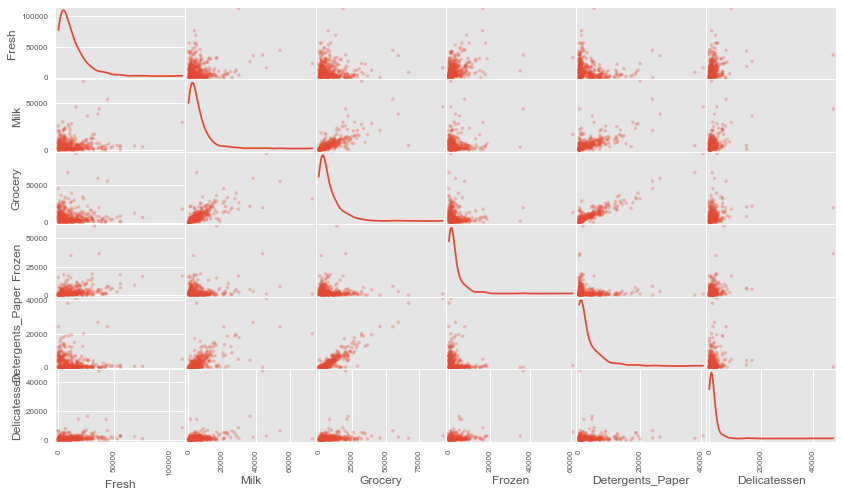

In [199]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**
- The distributions of each of the features are similar. They are clearly non-normal distributions that are highly positively skewed, i.e. skewed to the right, due to some outliers that have very large values and therefore have a mean significantly larger than the mean. With each feature, most values seem to be concentrated near zero, but the mode is not the minimum in any of them. If we would like to find a mathematical distribution that resembles these distributions, log-normal, power log-normal and F distribution with certain parameters seem to visually offer a close match.
- Grocery and Detergents_Paper clearly have the strongest correlaction of all, but also Milk and Grocery as well as Milk and Detergent_Paper exhibit some degree of correlation visible from the scatter matrix. We can quantify these correlations more clearly like below, which further bolsters these observations.
- This scrutiny mostly denies my suspicions about the irrelevance of the Fresh feature, as it seems Fresh does not correlate with any single feature. However, that does not mean that Fresh wouldn't correlate with some combination of the other features.

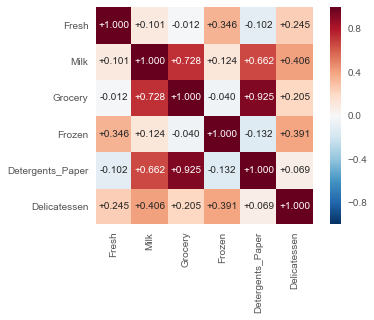

In [200]:
corr = data.corr()
sb.heatmap(corr, mask=False, square=True, annot=True, fmt='+.3f')

Just for curiosity, let's see what the R^2 scores for the other features are, and let's also try another random_state (= 10) and see how the score for Fresh changes:

In [201]:
featList = list(data.columns)
for feature in featList:
    target_label = data[feature]
    new_data = data.drop(feature, axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(new_data, target_label, test_size = 0.25, random_state = 10)

    regressor = DecisionTreeRegressor(random_state = 10)
    regressor.fit(X_train,y_train)

    score = regressor.score(X_test,y_test)
    print "The score of the prediction of {} was {}".format(feature, score)

The score of the prediction of Fresh was -0.379170072447
The score of the prediction of Milk was -0.442085754637
The score of the prediction of Grocery was 0.723800832652
The score of the prediction of Frozen was 0.0548481103591
The score of the prediction of Detergents_Paper was 0.494381677643
The score of the prediction of Delicatessen was -10.5626610325


So clearly there may be a lot of variation depending on at least the way the split of the train and test data is done, so here also a proper cross validation would be in place.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

C:\Users\jaakko.paavola\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


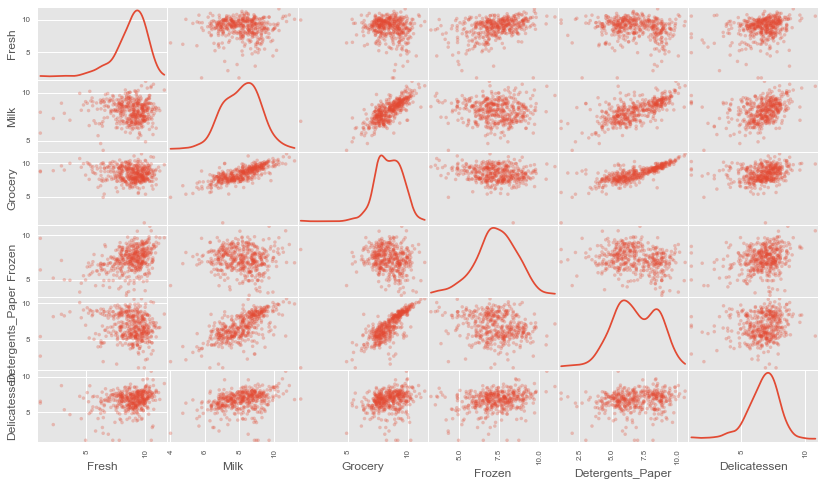

In [202]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data.copy())

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [203]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.687630,10.740670,11.437986,6.933423,10.617099,7.987524
1,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
2,8.967249,8.707152,9.053920,7.433075,8.171882,7.535830


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [204]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [205]:
foo = pd.DataFrame()
for feature in log_data.keys():
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    # Display the outliers
    foo = foo.append(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])

In [206]:
print pd.value_counts(foo.index.values.ravel())

154    3
66     2
75     2
128    2
65     2
183    1
81     1
412    1
218    1
343    1
86     1
109    1
193    1
142    1
325    1
420    1
187    1
203    1
137    1
264    1
338    1
161    1
96     1
353    1
57     1
184    1
439    1
289    1
305    1
304    1
175    1
429    1
145    1
171    1
233    1
285    1
38     1
357    1
356    1
355    1
98     1
95     1
dtype: int64


In [208]:
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [154, 66, 75, 128, 65]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**
- As we can see above in the printout of the frequencies, instance 154 was an outlier in three features and instances 66, 75, 128, and 65  were outliers in two features. That makes in total 5 data points.
- We must apply caution in removing data points that were indicated outliers, because despite of being outliers, their data feels correct, and not like a result of erroneous data input for instance. I would not readily remove data points just so that we could make the distribution of the dataset be more like a log-normal distribution, because perhaps the nature of the data is something else than what we can depict using mathematical distributions - at least any of the common ones. Removing outliers using some arbitrary criterion, as what  (Q3 - Q1) * 1.5 is, might work against itself, as we could be throwing away essential information about the population. Moreover, the amount of data, 440 data points, is not awfully a lot, so removing even just the five of them that were indicated as outliers in multiple features would have a considerable impact on our analysis. If I had strong domain knowledge and that would lead me to think that some of the instances have values that cannot be truthful, then I would certainly remove them, but I don't have such knowledge.
- Having said that, thinking about how outliers may impact k-means clustering if they draw cluster centers too much to their direction as the calculation is based on averaging, I decided to remove something. Looking at the log-transformed features, the distributions now seem to be skewed to the left, meaning that I would rather remove something from the left tail of the distribution. Looking at the five data points that have outliers in multiple features, the outliers seem to all be on the left tail and none on the right. Also, removing these five data points we could get us one outlier value off from all five feature distributions' left tails, making all of the five distributions a little bit less skewed. Therefore I think removing these five would be a good compromise between getting better-shaped distributions and loosing information.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

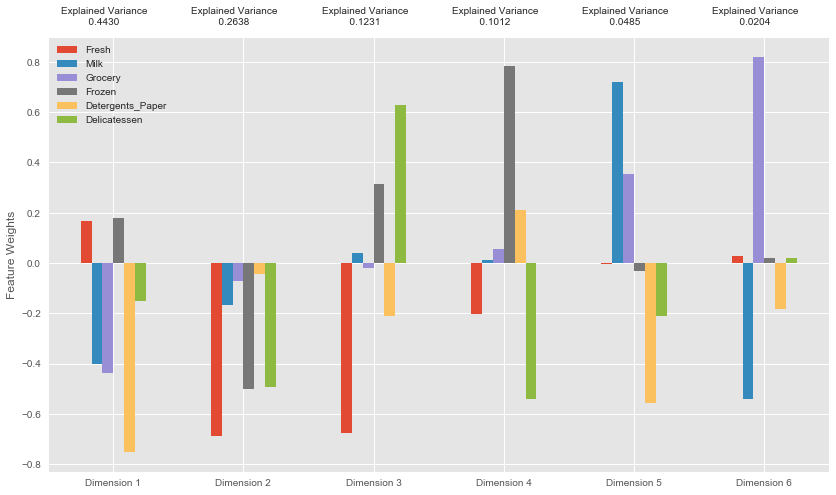

In [211]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA().fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**
- 70.68%
- 93.11%
- The visualization represents the PCA-generated components/dimensions and how they are compositions of the original features and their respective linear coefficients, also called feature weights. If a feature weight is close to 1 or -1, the corresponding feature has a strong impact on the component, while close to zero it has an insignificant impact.
- Dimension 1: The most significant feature weight is with Detergents_Paper, at close to -0.8, followed by Grocery and Milk, both close to -0.4. The other features' weights are minuscule. It sounds like the first dimension represents spending on daily consumer goods and thus could be a good measure to identify convenience stores, supermarkets and grocery stores among the clientele.
- Dimension 2: The most significant feature weight is with Fresh, at close to -0.7, followed by Frozen and Delicatessen, at close to -0.5, while the others are insignificant. The second dimensions represents spending on food stuff and food ingredients and as such could be a good measure to identify food markets, specialized grocery shops, restaurants, canteens and delis among the clientele.  
- Dimension 3: The most significant feature weight is again with Fresh and again close to -0.7, but then what is interesting here is that the second most significant weight is with Delicatessen at over 0.6, i.e. with an opposing sign. So this component models a negative correlation between Fresh and Delicatessen categories. I would say the third dimension represents the typical relationship between spending on fresh food stuff and delicacy foods, which is such that big buyers of either category tend to focus on that category at the expense of the other one. The third dimension could be an apt measure to identify specialized wholesalers, distributors, retailers or restaurateurs of fresh foods or those of delicacy foods.
- Dimension 4: The most significant feature weight is with the Frozen category at nearly 0.8 and again Delicatessen is of an opposing sign and at over -0.5. So this component models a negative correlation between Frozen and Delicatessen. The fourth dimension therefore represents a relationship between spending on frozen foods and delicacy foods, in which big buyers of either category tend to focus on that category at the expense of the other one. Thus the fourth dimension could be an apt measure to identify wholesalers, distributors or specialized retailers of frozen food stuff or those of delicacy foods.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [212]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-5.3316,-1.8845,-0.6957,-0.1972,0.5461,0.3802
1,-0.5023,6.0080,5.0055,0.3870,0.8576,0.3129
2,-1.5972,-0.8047,0.1483,-0.0839,-0.3191,-0.0512


Dimension 1 could be used to distinguish businesses that sell daily consumer goods from e.g. restaurants and food markets. Dimension 1 gives a high value for the first establishment in the sample, being pretty much in line with my thoughts about the first establishment being a wholesaler, a distributor or a big retailer like a hypermarket. 

We don't get to see it with this sample, but dimension 2 could be used to pick out restaurants and food markets. 

Dimension 3 on the other hand could pick out that the second establishment is a specialized trader of delicacies, confirming my thoughts that it could be a small fast food business.

It seems that dimension 4 can't guide us to much any direction with the sample dataset, as the values for this component are so small.

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [213]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [216]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-5.3316,-1.8845
1,-0.5023,6.0080
2,-1.5972,-0.8047


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

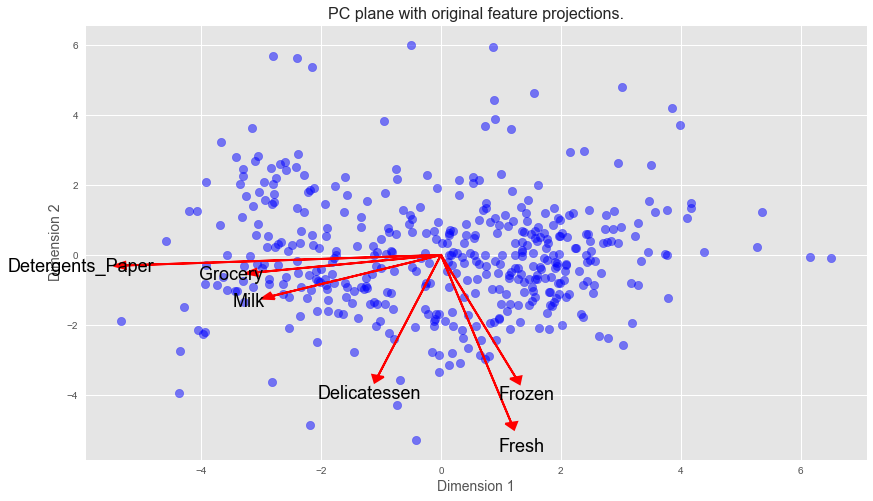

In [217]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

Clearly Detergents_Paper, Grocery and Milk correlate most with the first component and Delicatessen, Frozen and Fresh with the second component. This observation is in line with the earlier ones.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**
- K-means clustering is simple, has fast model training and converges fast (and always), and its results are easy to interpret. It's at its best when hard cluster assignment, i.e. each data point belongs to only one cluster, is appropriate for the dataset, and when clusters are of a spherical shape with the same variance. It is efficient: O(nkdt), where n is the number of data points, k is the number of clusters, d is the number of dimension of each data point, and t is the number of iterations. Normally, k, t, d << n.
- Gaussian Mixture Model clustering may give better results than k-means when the clusters are of disparate sizes, are overlapping one another or have different shapes and orientations. GMM clustering provides soft cluster assignment, which means that it introduces uncertainty - or probability - to the assignments of data points to clusters. Another way to say it is that each data point can belong to multiple clusters with different probabilities. For example, a data point could be given a 78% chance of belonging to cluster A, 20% change of belonging to B, and 2% chance of belonging to C. GMM also takes cluster shapes into consideration, not only cluster centers (centroids) like k-means, so it beats k-means when working with non-spherically-shaped or overlapping clusters.
- I will use GMM, because from the biplot it seems that there are no clearly separated clusters and thus there may be a lot of cases of mixed membership in the population, like a client that is both a grocery shop and a restaurant.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [218]:
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score

In [232]:
nOfClusters = list(range(2, 3))

for n in nOfClusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GMM(n_components = n, random_state = 1).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)

    print "The silhouette score of reduced_data against preds for {} clusters was: ".format(n), score

The silhouette score of reduced_data against preds for 2 clusters was:  0.411818864386


C:\Users\jaakko.paavola\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\jaakko.paavola\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\jaakko.paavola\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

The silhouette score of reduced_data against preds for 2 clusters was:  0.411818864386

The silhouette score of reduced_data against preds for 3 clusters was:  0.376166165091

The silhouette score of reduced_data against preds for 4 clusters was:  0.332470648079

The silhouette score of reduced_data against preds for 5 clusters was:  0.277006754052

The silhouette score of reduced_data against preds for 6 clusters was:  0.28739910844

The silhouette score of reduced_data against preds for 7 clusters was:  0.325023833619

The silhouette score of reduced_data against preds for 8 clusters was:  0.296635440638

The silhouette score of reduced_data against preds for 9 clusters was:  0.314964371012

The best score was with 2 clusters.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

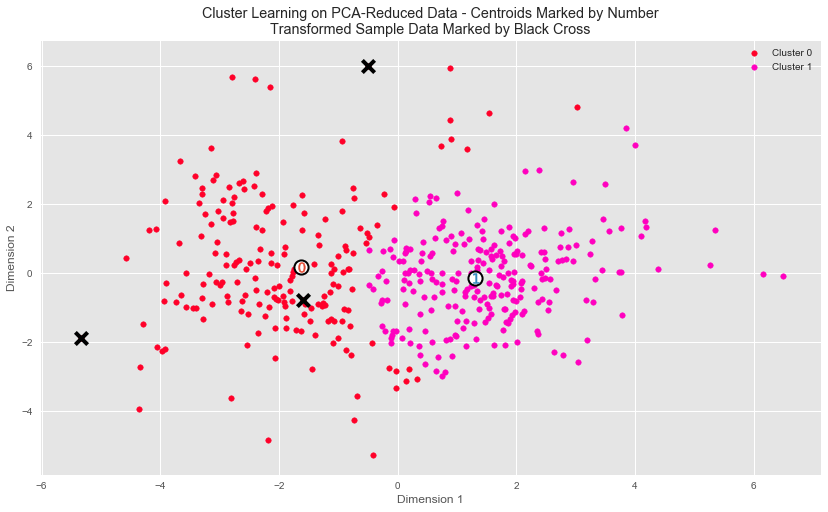

In [233]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [234]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4316.0,6347.0,9555.0,1036.0,3046.0,945.0
Segment 1,8812.0,2052.0,2689.0,2058.0,337.0,712.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**
Segment 0 represents retail business, judging from the high spending on the categories Milk, Grocery and Detergents_Paper.
Segment 1 represents foodservice industry, judging from the high spending on the category Fresh and low spending on Detergents_Paper. To some extent the value in the category Frozen is also sensible for foodservice industry.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [235]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


**Answer:**
The prediction is quite well in line with my earlier thoughts on the nature of these establishments. Only the middle one I was unsure if it is a fast food shop or a small kiosk or convenience store, but this prediction says it belongs to segment zero, which I believe to mean it should be a retail business then.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
In segment 0, the retail business clients, a reduction in the delivery frequency is more likely to give rise to no negative reactions, because they order less fresh food than clients in segment 1. Perhaps 3 deliveries instead of 5 per week would even be greeted with delight by some business owners, because that could mean they can reduce staff on duty so that only 3 days a week they have extra hands to do the unloading and shelving of the deliveries. But there could certainly be negative reactions as well, because it would affect the offering of fresh products in the client stores, and also those 3 deliveries would become larger and mean that the stores would get bigger inventories. In segment 1 the reaction is more likely negative, because understandably businesses in foodservice want their food stuff delivered as fresh as possible and in a just-in-time fashion to be able to serve better quality food to their customers and to keep their stocks smaller.

This is educated guesstimation of course, and the true impact can only be determined with a test like A/B. We can run the test on samples selected from both of the clusters equally.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
We could either just include the new customers' data in the dataset and run a clustering algorithm again, or we could shift to supervised learning and use the cluster label, i.e. the customer segment label, as the target variable.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

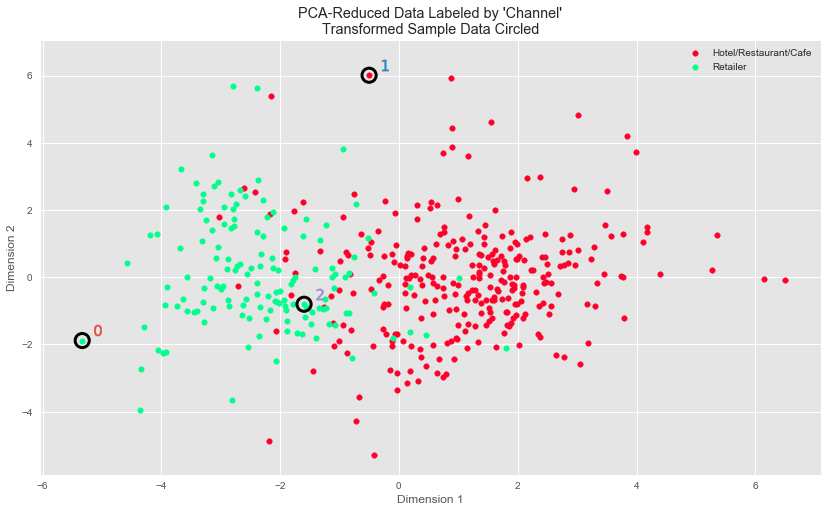

In [236]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

- The number of clusters was the same.
- Towards the left and right edges of the graph we find the purest retailers and hotels/restaurants/cafes, respectively. The true distribution seems to be greatly overlapping, making a clear-cut distinction into these two categories perhaps a bit ambiguous, and in the process, clustering a bit inaccurate.
- Yes, my speculation of a division into a retail business and a foodservice industry cluster was quite spot-on. But my clustering algorithm didn't manage quite so well when reflected against the channel labels. As a result, one of the customers I picked into my sample got an incorrect prediction of customer segment.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.